In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
# Load datasets
books = pd.read_csv('../Data/Books.csv', on_bad_lines='skip', encoding='latin-1')
users = pd.read_csv('../Data/Users.csv', on_bad_lines='skip', encoding='latin-1')
ratings = pd.read_csv('../Data/Ratings.csv', on_bad_lines='skip', encoding='latin-1')

C:\Users\Acer\AppData\Local\Temp\ipykernel_6684\656037340.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('../Data/Books.csv', on_bad_lines='skip', encoding='latin-1')


In [50]:
# Books data
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [51]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [52]:
# Unique books
print("Unique ISBNs:", books['ISBN'].nunique())
print("Unique Book Titles:", books['Book-Title'].nunique())
print("Unique Authors:", books['Book-Author'].nunique())

Unique ISBNs: 271360
Unique Book Titles: 242135
Unique Authors: 102022


In [53]:
# Popular authors
print("Top 10 Authors:\n", books['Book-Author'].value_counts().head(10))

Top 10 Authors:
 Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


In [54]:
# Popular publishers
print("Top 10 Publishers:\n", books['Publisher'].value_counts().head(10))

Top 10 Publishers:
 Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64


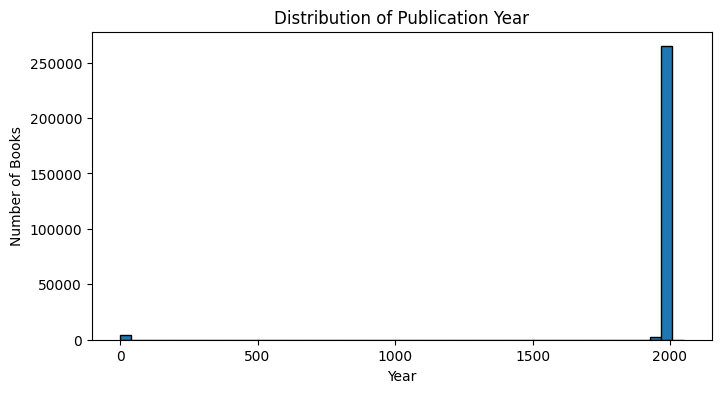

In [55]:
# Publication year distribution
plt.figure(figsize=(8,4))
years = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
years.dropna().astype(int).plot(kind='hist', bins=50, edgecolor='black')
plt.title("Distribution of Publication Year")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()

### User Data Analysis & EDA

In [56]:
# User data
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [57]:
users.isnull().sum()



User-ID          0
Location         0
Age         110762
dtype: int64

In [58]:
# Unique users
print("Unique User IDs:", users['User-ID'].nunique())

Unique User IDs: 278858


In [59]:
# Age analysis
print("Age Stats:")
print(users['Age'].describe())

Age Stats:
count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64


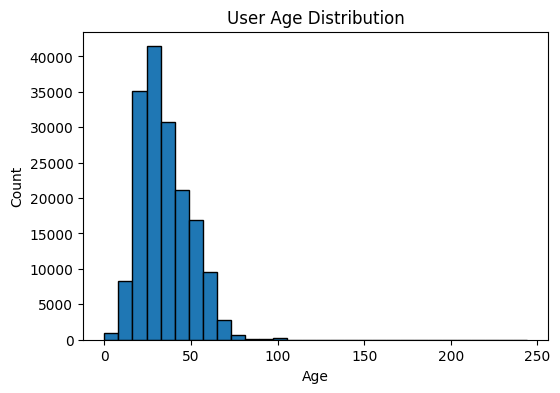

In [60]:
# Plot Age distribution
plt.figure(figsize=(6,4))
users['Age'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Ratings Data Analysis & EDA

In [61]:
# Ratings data
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [62]:
ratings.isnull().sum()


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [63]:
# Unique counts
print("Unique Users:", ratings['User-ID'].nunique())
print("Unique Books:", ratings['ISBN'].nunique())

Unique Users: 105283
Unique Books: 340556


In [64]:
print("Rating Stats:")
print(ratings['Book-Rating'].describe())

Rating Stats:
count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64


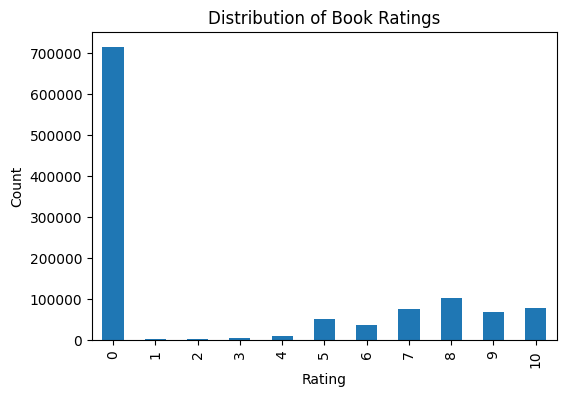

In [65]:
# Distribution of ratings
plt.figure(figsize=(6,4))
ratings['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [66]:
# Check duplicates
print("Books duplicates:", books.duplicated().sum())
print("Users duplicates:", users.duplicated().sum())
print("Ratings duplicates:", ratings.duplicated().sum())

Books duplicates: 0
Users duplicates: 0
Ratings duplicates: 0


## Content Based Recommender System

In [67]:
# Books data for content-based filtering
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [68]:
# Fill missing values
books['Book-Author'] = books['Book-Author'].fillna('Unknown')
books['Publisher'] = books['Publisher'].fillna('Unknown')
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(books['Year-Of-Publication'].median())


In [69]:
# Add rating information to books
book_ratings = ratings.groupby('ISBN').agg({
    'Book-Rating': ['count', 'mean']
}).round(2)


In [70]:
book_ratings.columns = ['rating_count', 'avg_rating']
book_ratings = book_ratings.reset_index()
book_ratings.head()


,ISBN,rating_count,avg_rating
0,0330299891,2,3.0
1,0375404120,2,1.5
2,0586045007,1,0.0
3,9022906116,2,3.5
4,9032803328,1,0.0


In [71]:
# Merge books with ratings
books_with_ratings = books.merge(book_ratings, on='ISBN', how='left')
books_with_ratings['rating_count'] = books_with_ratings['rating_count'].fillna(0)
books_with_ratings['avg_rating'] = books_with_ratings['avg_rating'].fillna(0)
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,rating_count,avg_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1.0,0.00
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14.0,4.93
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3.0,5.00
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11.0,4.27
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1.0,0.00


In [72]:
books_with_ratings['Image-URL-M'][0]

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [73]:
# Filter books with sufficient ratings
popular_books = books_with_ratings[books_with_ratings['rating_count'] >= 10].copy() 
print(f"Books with 10+ ratings: {len(popular_books)}")

Books with 10+ ratings: 17479


In [74]:
# Create content features by combining author and publisher
popular_books['content'] = popular_books['Book-Author'] + ' ' + popular_books['Publisher']
popular_books['content'].head()

1     Richard Bruce Wright HarperFlamingo Canada
3          Gina Bari Kolata Farrar Straus Giroux
5                       Amy Tan Putnam Pub Group
18                             John Grisham Dell
19                           Toni Morrison Plume
Name: content, dtype: object

In [75]:
# Create TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(popular_books['content'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (17479, 5000)


In [76]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Similarity matrix shape: {cosine_sim.shape}")

Similarity matrix shape: (17479, 17479)


In [77]:
# Create a series with book titles as index
indices = pd.Series(popular_books.index, index=popular_books['Book-Title']).drop_duplicates()
indices.head()


Book-Title
Clara Callan                                                                                           1
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It     3
The Kitchen God's Wife                                                                                 5
The Testament                                                                                         18
Beloved (Plume Contemporary Fiction)                                                                  19
dtype: int64

### Content-Based Recommendation Function

In [ ]:
def content_recommender(title, cosine_sim=cosine_sim, n=5):
    """
    Recommend books based on content similarity (author + publisher)
    """
    # Check if the book exists in indices
    if title not in indices:
        print(f"Book '{title}' not found in dataset.")
        return
    
    # Get index of book (handle duplicates by taking the first one)
    idx = indices[title]
    if isinstance(idx, pd.Series):  
        idx = idx.iloc[0]
    
    # Get similarity scores for this book with all books
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort books by similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top n similar books (excluding the book itself)
    sim_scores = sim_scores[1:n+1]
    
    # Get book indices
    book_indices = [i[0] for i in sim_scores]
    
    # Return recommended books
    recommendations = popular_books.iloc[book_indices][['Book-Title', 'Book-Author', 'Publisher', 'avg_rating', 'rating_count']]
    
    print(f"Recommendations for '{title}':")
    print("-" * 60)
    for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
        print(f"{i}. {row['Book-Title']}")
        print(f"   Author: {row['Book-Author']}")
        print(f"   Publisher: {row['Publisher']}")
        print(f"   Rating: {row['avg_rating']:.2f} ({int(row['rating_count'])} reviews)")
        print()
    
    return recommendations


# Example usage
content_recommender("The Kitchen God's Wife", n=5)


Recommendations for 'The Kitchen God's Wife':
------------------------------------------------------------
1. A Gracious Plenty : A Novel
   Author: SHERI REYNOLDS
   Publisher: Three Rivers Press
   Rating: 4.61 (18 reviews)

2. Where the Girls Are: Growing Up Female With the Mass Media
   Author: Susan J. Douglas
   Publisher: Three Rivers Press (CA)
   Rating: 3.85 (13 reviews)

3. Dave Barry Talks Back
   Author: Dave Barry
   Publisher: Three Rivers Press (CA)
   Rating: 2.28 (18 reviews)

4. Your Body's Many Cries for Water
   Author: F. Batmanhelidj
   Publisher: Tagman Press
   Rating: 3.15 (13 reviews)

5. Beyond Civilization: Humanity's Next Great Adventure
   Author: Daniel Quinn
   Publisher: Three Rivers Press (CA)
   Rating: 7.91 (11 reviews)



,Book-Title,Book-Author,Publisher,avg_rating,rating_count
19665,A Gracious Plenty : A Novel,SHERI REYNOLDS,Three Rivers Press,4.61,18.0
10208,Where the Girls Are: Growing Up Female With th...,Susan J. Douglas,Three Rivers Press (CA),3.85,13.0
73291,Dave Barry Talks Back,Dave Barry,Three Rivers Press (CA),2.28,18.0
76930,Your Body's Many Cries for Water,F. Batmanhelidj,Tagman Press,3.15,13.0
43690,Beyond Civilization: Humanity's Next Great Adv...,Daniel Quinn,Three Rivers Press (CA),7.91,11.0


In [79]:
## pickling the model for future use
import pickle
pickle.dump(books_with_ratings, open('popular_books.pkl','wb'))